In [1]:
import numpy as np
import pandas as pd
import math
import numpy.random as rand
import scipy
from scipy.stats import binom as binomial
from scipy.stats import beta as betafunction
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pickle
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True) #Want to be able to use tex in the plot labels

import seaborn
seaborn.set_style('ticks')
seaborn.set_color_codes()
import corner


In [2]:
#Load in chains run using all three datasets from fake data:
samples = []
i = 0
burnin = 1000
for line in open('chains/fakedata/veff0.5/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples50 = np.array(samples)
samples50 = samples50.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.6/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples60 = np.array(samples)
samples60 = samples60.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.7/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples70 = np.array(samples)
samples70 = samples70.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.8/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples80 = np.array(samples)
samples80 = samples80.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.9/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples90 = np.array(samples)
samples90 = samples90.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff1.0/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples100 = np.array(samples)
samples100 = samples100.astype(float)

In [3]:
#Load in chains run using all three datasets from fake data:

samples = []
i = 0
for line in open('chains/fakedata/vaxcase/veff0.6/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samplesvc60 = np.array(samples)
samplesvc60 = samplesvc60.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/vaxcase/veff0.7/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samplesvc70 = np.array(samples)
samplesvc70 = samplesvc70.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/vaxcase/veff0.8/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samplesvc80 = np.array(samples)
samplesvc80 = samplesvc80.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/vaxcase/veff0.9/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samplesvc90 = np.array(samples)
samplesvc90 = samplesvc90.astype(float)

In [4]:
#Actual data
Data_pd = pd.read_csv("../Data/FakeData50_veff0.6.csv",header=None)
Data60 = Data_pd.as_matrix()
vo60 = Data60[:,0].copy()
vt60 = Data60[:,1].copy()
so60 = Data60[:,2].copy()
st60 = Data60[:,3].copy()
cobs60 = Data60[:,4].copy()

total_cases60 = np.sum(cobs60[:])

vobs60 = vo60.copy()
vtry60 = vt60.copy()
sobs60 = so60.copy()
stry60 = st60.copy()


Data_pd = pd.read_csv("../Data/FakeData50_veff0.9.csv",header=None)
Data90 = Data_pd.as_matrix()
vo90 = Data90[:,0].copy()
vt90 = Data90[:,1].copy()
so90 = Data90[:,2].copy()
st90 = Data90[:,3].copy()
cobs90 = Data90[:,4].copy()
total_cases90 = np.sum(cobs90[:])

vobs90 = vo90.copy()
vtry90 = vt90.copy()
sobs90 = so90.copy()
stry90 = st90.copy()


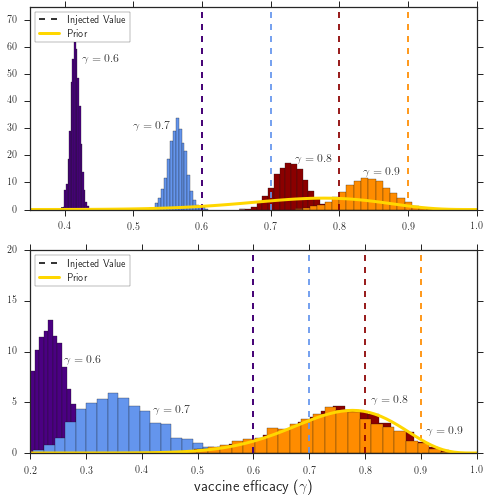

In [66]:
#Look at v_eff:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax0, ax1 = axes.flatten()

x = np.linspace(0,1,100)
y = scipy.stats.beta.pdf(x,a=15.,b=5.)
#veff50,b,c = plt.hist(samples50[:,6],bins=20, normed=True)
#plt.figure(figsize=(4*2,3*2))
veff60,b,c = ax0.hist(samples60[:,6],bins=20, normed=True, color ='indigo')
ax0.axvline(0.6,c='k',ls='--',label='Injected Value')
ax0.axvline(0.6,c='indigo',ls='--')
veff70,b,c = ax0.hist(samples70[:,6],bins=20, normed=True, color = 'cornflowerblue')
ax0.axvline(0.7,c='cornflowerblue',ls='--')
veff80,b,c = ax0.hist(samples80[:,6],bins=20, normed=True, color = 'darkred')
ax0.axvline(0.8,c='darkred',ls='--')
veff90,b,c = ax0.hist(samples90[:,6],bins=20, normed=True, color = 'darkorange')
ax0.axvline(0.9,c='darkorange',ls='--')
#veff100,b,c = plt.hist(samples100[:,6],bins=20, normed=True, color ='darkdarkgreen')
ax0.plot(x,y,color='gold',lw=3, label='Prior')
ax0.legend(loc='upper left',frameon=True)
ax0.annotate('$\gamma = 0.6$',(0.425,55),fontsize=12)
ax0.annotate('$\gamma = 0.7$',(0.5,30),fontsize=12)
ax0.annotate('$\gamma = 0.8$',(0.735,18),fontsize=12)
ax0.annotate('$\gamma = 0.9$',(0.835,13),fontsize=12)
ax0.set_xlim(0.35,1)
ax0.set_ylim(0,75)
#ax0.set_xlabel('vaccine efficacy ($\gamma$)',fontsize=15)

veff60,b,c = ax1.hist(samplesvc60[:,6],bins=30, normed=True, color ='indigo')
ax1.axvline(0.6,c='k',ls='--',label='Injected Value')
ax1.axvline(0.6,c='indigo',ls='--')
veff70,b,c = ax1.hist(samplesvc70[:,6],bins=30, normed=True, color = 'cornflowerblue')
ax1.axvline(0.7,c='cornflowerblue',ls='--')
veff80,b,c = ax1.hist(samplesvc80[:,6],bins=30, normed=True, color = 'darkred')
ax1.axvline(0.8,c='darkred',ls='--')
veff90,b,c = ax1.hist(samplesvc90[:,6],bins=30, normed=True, color = 'darkorange')
ax1.axvline(0.9,c='darkorange',ls='--')
#veff100,b,c = plt.hist(samples100[:,6],bins=20, normed=True, color ='darkdarkgreen')
ax1.plot(x,y,color='gold',lw=3, label='Prior')
ax1.legend(loc='upper left',frameon=True)
ax1.annotate('$\gamma = 0.6$',(0.26,9),fontsize=12)
ax1.annotate('$\gamma = 0.7$',(0.42,4),fontsize=12)
ax1.annotate('$\gamma = 0.8$',(0.81,5),fontsize=12)
ax1.annotate('$\gamma = 0.9$',(0.91,2),fontsize=12)
ax1.set_xlim(0.2,1)
ax1.set_ylim(0,20)
ax1.set_xlabel('vaccine efficacy ($\gamma$)',fontsize=15)

plt.savefig('veff_fakedata.png',dpi=300,bbox_inches="tight")

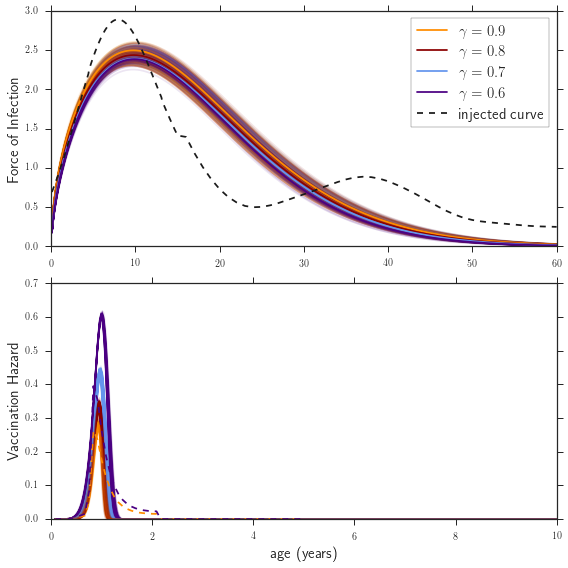

In [67]:
#Look at vh and foi:
foiinj = np.genfromtxt('../Simulations/foi_injected.csv',delimiter=',') #injected foi
vhdat = np.genfromtxt('../Simulations/pvaccCov90_30.csv',delimiter=' ') #injected vacc. hazard
vaxhazdat = vhdat[:,1].copy()
vhinj = np.zeros(60)
i=0
for vh in vhdat[:,1]:
    vhinj[i] = vh
    i += 1

xplot = np.linspace(1,60,60)
nspace = 2000
x = np.linspace(1,60*12,nspace)
foi50 = np.zeros(nspace)
foi60 = np.zeros(nspace)
foi70 = np.zeros(nspace)
foi80 = np.zeros(nspace)
foi90 = np.zeros(nspace)

vhaz60 = np.zeros(nspace)
vhaz70 = np.zeros(nspace)
vhaz80 = np.zeros(nspace)
vhaz90 = np.zeros(nspace)

l = len(samples60[:,0])
l = 2000
nplot = 300
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax0, ax1 = axes.flatten()

for k in range(nplot):
    index = np.random.randint(l)
    
    va60 = samples60[index,0] 
    vb60 = samples60[index,1] 
    vh60 = samples60[index,2]  
    fa60 = samples60[index,3] 
    fb60 = samples60[index,4] 
    fh60 = samples60[index,5] 
    ve60 = samples60[index,6]
    
    va70 = samples70[index,0] 
    vb70 = samples70[index,1] 
    vh70 = samples70[index,2]  
    fa70 = samples70[index,3] 
    fb70 = samples70[index,4] 
    fh70 = samples70[index,5] 
    ve70 = samples70[index,6]
    
    va80 = samples80[index,0] 
    vb80 = samples80[index,1] 
    vh80 = samples80[index,2] 
    fa80 = samples80[index,3] 
    fb80 = samples80[index,4] 
    fh80 = samples80[index,5] 
    ve80 = samples80[index,6] 

    
    va90 = samples90[index,0] 
    vb90 = samples90[index,1] 
    vh90 = samples90[index,2] 
    fa90 = samples90[index,3] 
    fb90 = samples90[index,4] 
    fh90 = samples90[index,5] 
    ve90 = samples90[index,6] 

    
    j = 0
    for i in x:
        a = float(i)
        foi90[j] = fh90*(a/fb90)**(fa90-1.)*np.exp(-(a/fb90)**(fa90))
        vhaz90[j] = vh90*(a/vb90)**(va90-1.)*np.exp(-(a/vb90)**(va90))
        
        foi80[j] = fh80*(a/fb80)**(fa80-1.)*np.exp(-(a/fb80)**(fa80))
        vhaz80[j] = vh80*(a/vb80)**(va80-1.)*np.exp(-(a/vb80)**(va80))
        
        foi70[j] = fh70*(a/fb70)**(fa70-1.)*np.exp(-(a/fb70)**(fa70))
        vhaz70[j] = vh70*(a/vb70)**(va70-1.)*np.exp(-(a/vb70)**(va70))
        
        foi60[j] = fh60*(a/fb60)**(fa60-1.)*np.exp(-(a/fb60)**(fa60))
        vhaz60[j] = vh60*(a/vb60)**(va60-1.)*np.exp(-(a/vb60)**(va60))
        j += 1
    ax0.plot(x/12.,foi90,alpha=0.1,color='darkorange')
    ax0.plot(x/12.,foi60,alpha=0.1,color='indigo')
    ax0.plot(x/12.,foi80,alpha=0.1,color='darkred')
    ax0.plot(x/12.,foi70,alpha=0.1,color='cornflowerblue')
    ax1.plot(x/12.,vhaz90,alpha=0.1,color='darkorange',linewidth=1)
    ax1.plot(x/12.,vhaz60,alpha=0.1,color='indigo',linewidth=1)
    ax1.plot(x/12.,vhaz80,alpha=0.1,color='darkred')
    ax1.plot(x/12.,vhaz70,alpha=0.1,color='cornflowerblue')

ax0.plot(x/12.,foi90,alpha=1.,color='darkorange',label='$\gamma = 0.9$')   
ax0.plot(x/12.,foi80,alpha=1.,color='darkred',label='$\gamma = 0.8$')
ax0.plot(x/12.,foi70,alpha=1.,color='cornflowerblue',label='$\gamma = 0.7$')
ax0.plot(x/12.,foi60,alpha=1.,color='indigo',label='$\gamma = 0.6$')
ax0.plot(foiinj[:,0]/12.,foiinj[:,1]/10.,'k--',label='injected curve')
ax1.plot(xplot/12.,vhinj/0.9,color='darkorange', linestyle='--')
ax1.plot(xplot/12.,vhinj/0.6,color='indigo', linestyle='--')
ax0.set_ylabel('Force of Infection',fontsize=15)
ax1.set_ylabel('Vaccination Hazard',fontsize=15)
ax0.legend(fontsize=15,frameon=True)
ax1.set_xlim(0,10)
plt.xlabel('age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('foivhaz_fakedata_vaxserocase.pdf',bbox_inches='tight')

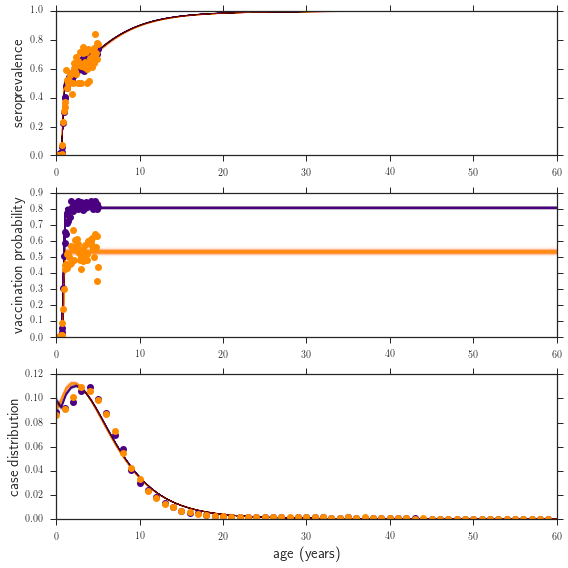

In [70]:
#Look at predicted vaccination level, seroprevalence, and case count:
nspace = 1200
x = np.linspace(1,60*12,nspace)
xplot = np.linspace(1,60,60)
xy = np.linspace(1,60,nspace)
cplot9 = np.zeros(nspace)
vplot9 = np.zeros(nspace)
splot9 = np.zeros(nspace)
cplot6 = np.zeros(nspace)
vplot6 = np.zeros(nspace)
splot6 = np.zeros(nspace)

l = len(samples60[:,0])
nplot = 300
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
ax0, ax1, ax2 = axes.flatten()
for k in range(nplot):
    index = np.random.randint(l)
    
    va60 = samples60[index,0] 
    vb60 = samples60[index,1] 
    vh60 = samples60[index,2]  
    fa60 = samples60[index,3] 
    fb60 = samples60[index,4] 
    fh60 = samples60[index,5] 
    ve60 = samples60[index,6]
    
    va90 = samples90[index,0] 
    vb90 = samples90[index,1] 
    vh90 = samples90[index,2] 
    fa90 = samples90[index,3] 
    fb90 = samples90[index,4] 
    fh90 = samples90[index,5] 
    ve90 = samples90[index,6] 
    
    
    j = 0
    for i in x:
        a = float(i)
        vplot6[j] = 1. - np.exp(-vh60*(1. - np.exp(-(a/vb60)**va60)))
        splot6[j] = 1.0 - np.exp(-ve60*vh60*(1.-np.exp(-(i/vb60)**va60)) - fh60*(1. - np.exp((-(i/fb60)**fa60))))
        cplot6[j] = (1.-np.exp(-(fh60*fa60/fb60*(a*12./fb60))**(fa60-1.)*np.exp(-(a*12./fb60)**fa60)))\
        *(np.exp(-ve60*vh60*(1.-np.exp(-(a*12./vb60)**va60))-fh60*(1.-np.exp(-(a*12./fb60)**fa60))))
        
        vplot9[j] = 1. - np.exp(-vh90*(1. - np.exp(-(a/vb90)**va90)))
        splot9[j] = 1.0 - np.exp(-ve90*vh90*(1.-np.exp(-(i/vb90)**va90)) - fh90*(1. - np.exp((-(i/fb90)**fa90))))
        cplot9[j] = (1.-np.exp(-(fh90*fa90/fb90*((a*12.)/fb90))**(fa90-1.)*np.exp(-((a*12.)/fb90)**fa90)))\
        *(np.exp(-ve90*vh90*(1.-np.exp(-((a*12.)/vb90)**va90))-fh90*(1.-np.exp(-((a*12.)/fb90)**fa90))))
        j += 1
    ax1.plot(x/12,vplot6,alpha=0.01,color='indigo')
    ax0.plot((x-1)/12,splot6,alpha=0.01,color='indigo',linewidth=1)
    ax2.plot(x-1,cplot6/(sum(cplot6)*(x[1]-x[0])),alpha=0.01,color='indigo',linewidth=1)
    
    ax1.plot(x/12,vplot9,alpha=0.01,color='darkorange')
    ax0.plot((x-1)/12,splot9,alpha=0.01,color='darkorange',linewidth=1)
    ax2.plot(x-1,cplot9/(sum(cplot9)*(x[1]-x[0])),alpha=0.01,color='darkorange',linewidth=1)
        
ax1.plot(xplot/12.,vobs60.astype(float)/vtry60.astype(float), color ='indigo',linestyle='none',marker='o')
ax0.plot(xplot/12.,sobs60.astype(float)/stry60.astype(float),color='indigo',linestyle='none',marker='o')
ax2.plot(cobs60.astype(float)/total_cases60,color='indigo',linestyle='none',marker='o')

ax1.plot(xplot/12.,vobs90.astype(float)/vtry90.astype(float), color ='darkorange',linestyle='none',marker='o')
ax0.plot(xplot/12.,sobs90.astype(float)/stry90.astype(float),color='darkorange',linestyle='none',marker='o')
ax2.plot(cobs90.astype(float)/total_cases90,color='darkorange',linestyle='none',marker='o')

ax1.set_ylabel('vaccination probability',fontsize=15)
ax0.set_ylabel('seroprevalence',fontsize=15)
ax2.set_ylabel('case distribution',fontsize=15)
ax2.set_xlabel('age (years)',fontsize=15)

plt.xlim(0,60)
fig.tight_layout()
plt.savefig('vsc_simdata.pdf',bbox_inches='tight')

TypeError: `bins` must be an integer, a string, or an array

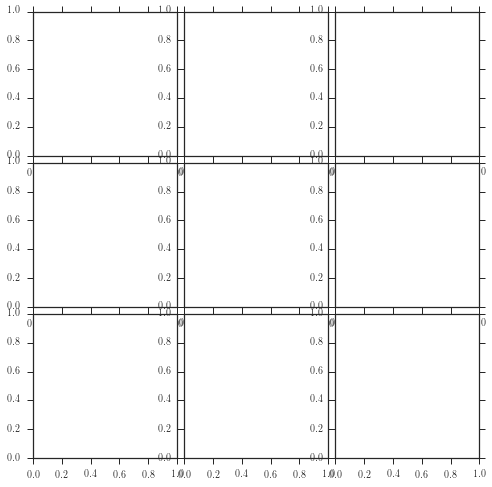

In [11]:
#Now you want to look at the real data.
#loc_subset = ['EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU', 'BASCONGO', 'KASAIOCC', 'KASAIOR',
 #          , 'NKIVU', 'SKIVU' ]
#country order: Katanga, Equateur, maniema, orientale, bandundu, kasaiocc, nkivu, skivu, (kasaior), (bascongo) (Kinshasa)
colors = ['darkorange','gold','green','blue','indigo','darkviolet','red','teal','grey']
burnin = 2000
loc_subset = ['EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC']#(0.5,4.),(500.,4500.),(0.,100.),(0.,1.)
#ranges = [(0.,4.),(10.,100.),(0.,20.),(0.,4.),(10.,100.),(0.,20.),(0.,1.)]


ranges = [(0.,15.),(8.,18.),(0.4,2.5)]
samples = []
i = 0
for line in open('chains/DRCLab/sero/KATANGA/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1
samples = np.array(samples)
samples = samples.astype(float)
csamp = samples[-1000:,0:3].copy()
fig = corner.corner(csamp,normed=True,color='plum',labels=[r"$v_\alpha$", r"$v_\beta$", r"$v_\eta$"],\
                    bins=50,range=ranges)

j = 0
for prov in loc_subset:
    samples = []
    c = colors[j]
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    csamp = samples[-1000:,0:3].copy()
    #corner.corner(csamp,range=ranges,no_fill_contours=True,bins=50,plot_density=False,plot_countours=False,color=c,fig=fig)
    corner.corner(csamp,range=ranges,no_fill_contours=True,bins=50,smooth=True,plot_density=False,plot_countours=False,color=c,fig=fig)
    j += 1
    
fig.savefig('cornerplotvparams.pdf')

TypeError: `bins` must be an integer, a string, or an array

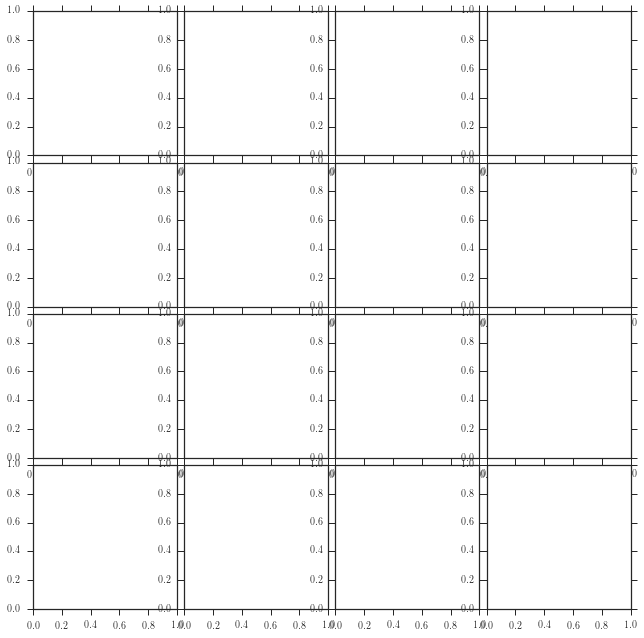

In [12]:
#country order: Katanga, Equateur, maniema, orientale, bandundu, kasaiocc, nkivu, skivu, (bascongo) (Kinshasa)
colors = ['darkorange','gold','green','blue','indigo','darkviolet','red','teal','grey']
burnin = 2000
loc_subset = ['EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC','KASAIOR','NKIVU','SKIVU']#(0.5,4.),(500.,4500.),(0.,100.),(0.,1.)
#ranges = [(0.,4.),(10.,100.),(0.,20.),(0.,4.),(10.,100.),(0.,20.),(0.,1.)]


ranges = [(0.4,2.),(50.,1000.),(0.,40.),(0.,1.)]
samples = []
i = 0
for line in open('chains/DRCLab/sero/KATANGA/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1
samples = np.array(samples)
samples = samples.astype(float)
csamp = samples[-1000:,3:7].copy()
fig = corner.corner(csamp,normed=True,color='plum',labels=[r"$f_\alpha$", r"$f_\beta$", r"$f_\eta$",r"$\gamma$"], \
                    bins=50,range=ranges)

j = 0
for prov in loc_subset:
    samples = []
    c = colors[j]
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    csamp = samples[-1000:,3:7].copy()
    corner.corner(csamp,range=ranges,no_fill_contours=True,bins=40,smooth=True,plot_density=False,plot_countours=False,color=c,fig=fig)
    j += 1

fig.savefig('cornerplotfparams.pdf')


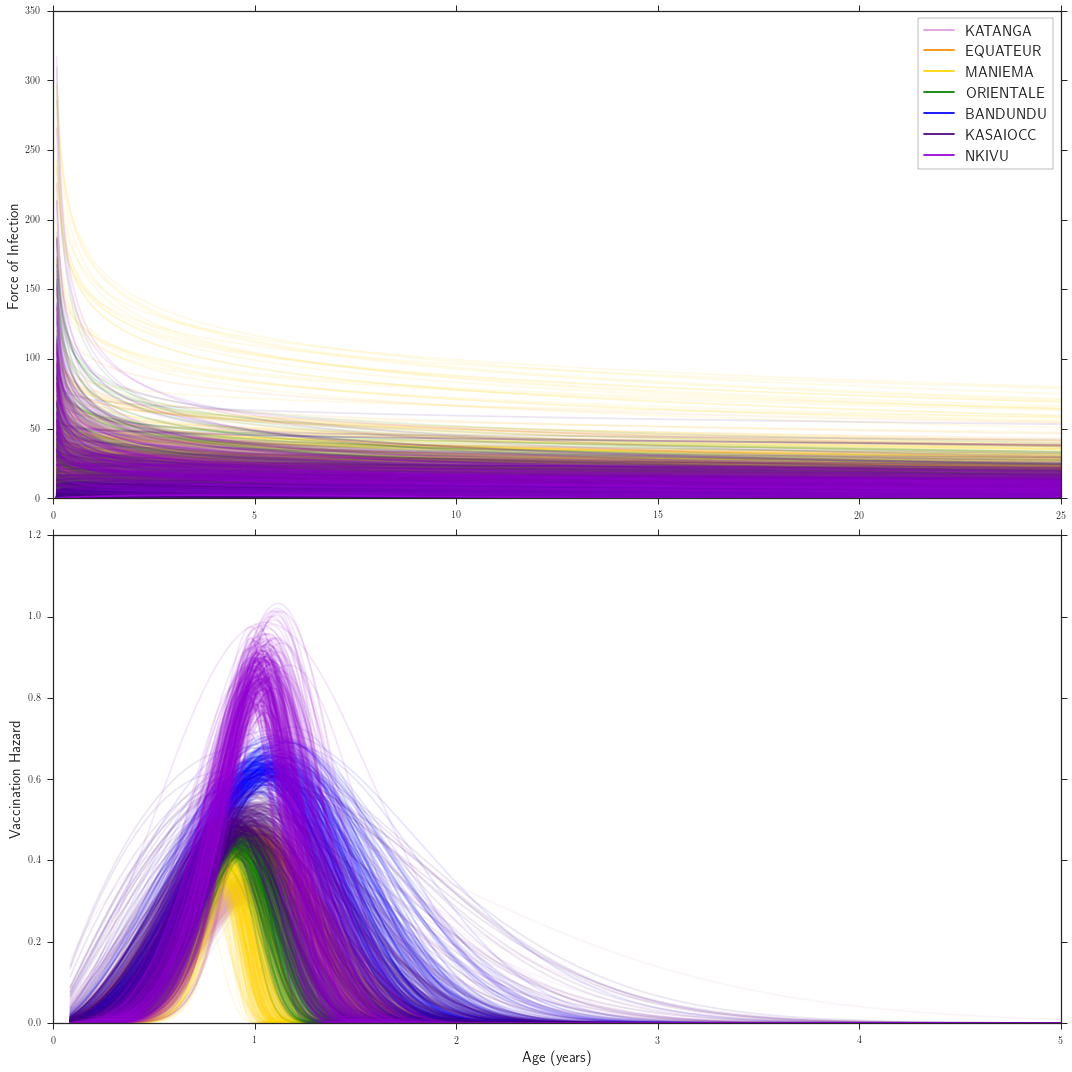

In [13]:
#Now FOI and vax hazard for DRC provinces
loc_subset = ['KATANGA','EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC','NKIVU']
colors = ['plum','darkorange','gold','green','blue','indigo','darkviolet','red','teal','grey','firebrick']
#loc_subset = ['BASCONGO','KINSHASA']
#colors = ['teal','firebrick'] #use grey for KASAIOCC
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
ax0, ax1 = axes.flatten()
j = 0
for prov in loc_subset:
    samples = []
    c = colors[j]
    j += 1
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    nspace = 2000
    x = np.linspace(1,25*12,nspace)
    
    foi = np.zeros(nspace)
    vhaz = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 300

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]

       
        m = 0
        for i in x:
            a = float(i)
            foi[m] = fh*(a/fb)**(fa-1.)*np.exp(-(a/fb)**(fa))
            vhaz[m] = vh*(a/vb)**(va-1.)*np.exp(-(a/vb)**(va))
            m += 1
        ax0.plot(x/12.,foi,alpha=0.1,color=c)
        ax1.plot(x/12.,vhaz,alpha=0.1,color=c)

    ax0.plot(x/12.,foi60,alpha=1.,color=c,label=prov)
ax0.set_ylabel('Force of Infection',fontsize=15)
ax1.set_ylabel('Vaccination Hazard',fontsize=15)
ax0.legend(fontsize=15,frameon=True)
ax1.set_xlim(0,5)
plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('DRC_foivachaz_noSKivu.pdf')

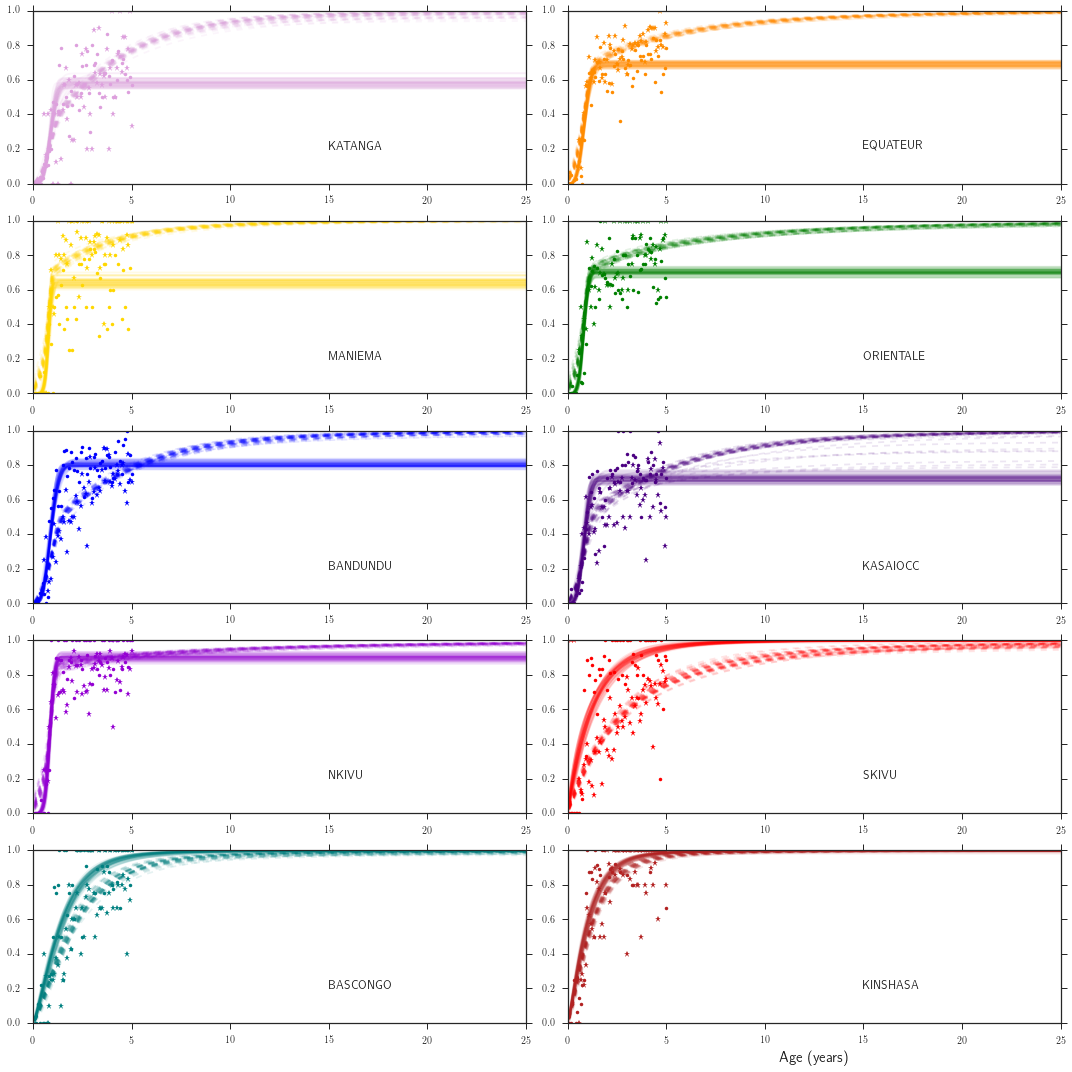

In [14]:
loc_subset = ['KATANGA','EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC','NKIVU','SKIVU','BASCONGO','KINSHASA']
#loc_subset = ['KATANGA','EQUATEUR','MANIEMA']
colors = ['plum','darkorange','gold','green','blue','indigo','darkviolet','red','teal','firebrick','grey']
#loc_subset = ['BASCONGO','KINSHASA']
#colors = ['teal','firebrick'] #use grey for KASAIOCC
#Real data, read in with Pandas.
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')
xplot = np.linspace(1,60,60)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axis = axes.flatten()
j = 0
for prov in loc_subset:
    #Read in the actual data
    vobs = vobs_pandas.loc[:,prov]
    vtrial = vtrials_pandas.loc[:,prov]
    sobs = sobs_pandas.loc[:,prov]
    strial = strials_pandas.loc[:,prov]
    cases = cases_pandas.loc[:,prov]
    vo = vobs.values
    vt = vtrial.values
    so = sobs.values
    st = strial.values
    co = cases.values
    
    vobs = np.copy(vo)
    vtry = np.copy(vt)
    sobs = np.copy(so)
    stry = np.copy(st)
    cobs = np.copy(co)  
    vtry = np.array(vtry)
    
    
    

    #Get the samples for this province
    samples = []
    c = colors[j]
    ax = axis[j]
    j += 1
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    nspace = 1000
    x = np.linspace(1,25*12,nspace)
    
    
    
    vacc = np.zeros(nspace)
    sero = np.zeros(nspace)
    case = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 50

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]

       
        m = 0
        for i in x:
            a = float(i)
            vacc[m] = 1. - np.exp(-vh*(1. - np.exp(-(a/vb)**va)))
            sero[m] = 1.0 - np.exp(-ve*vh*(1.-np.exp(-(i/vb)**va)) - fh*(1. - np.exp((-(i/fb)**fa))))
            m += 1
        ax.plot(x/12.,vacc,alpha=0.1,color=c)
        ax.plot(x/12.,sero,alpha=0.1,color=c,linestyle='dashed')
    ax.plot(xplot/12.,vobs.astype(float)/vtry.astype(float),color=c,marker='.',linestyle='none')
    ax.plot(xplot/12.,sobs.astype(float)/stry.astype(float),color=c,marker='*',linestyle='none')
    ax.annotate(prov,(15,0.2),fontsize=12)

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('VaccSeroFits.png')
#plt.savefig('DRC_foivachaz_noSKivu.pdf')

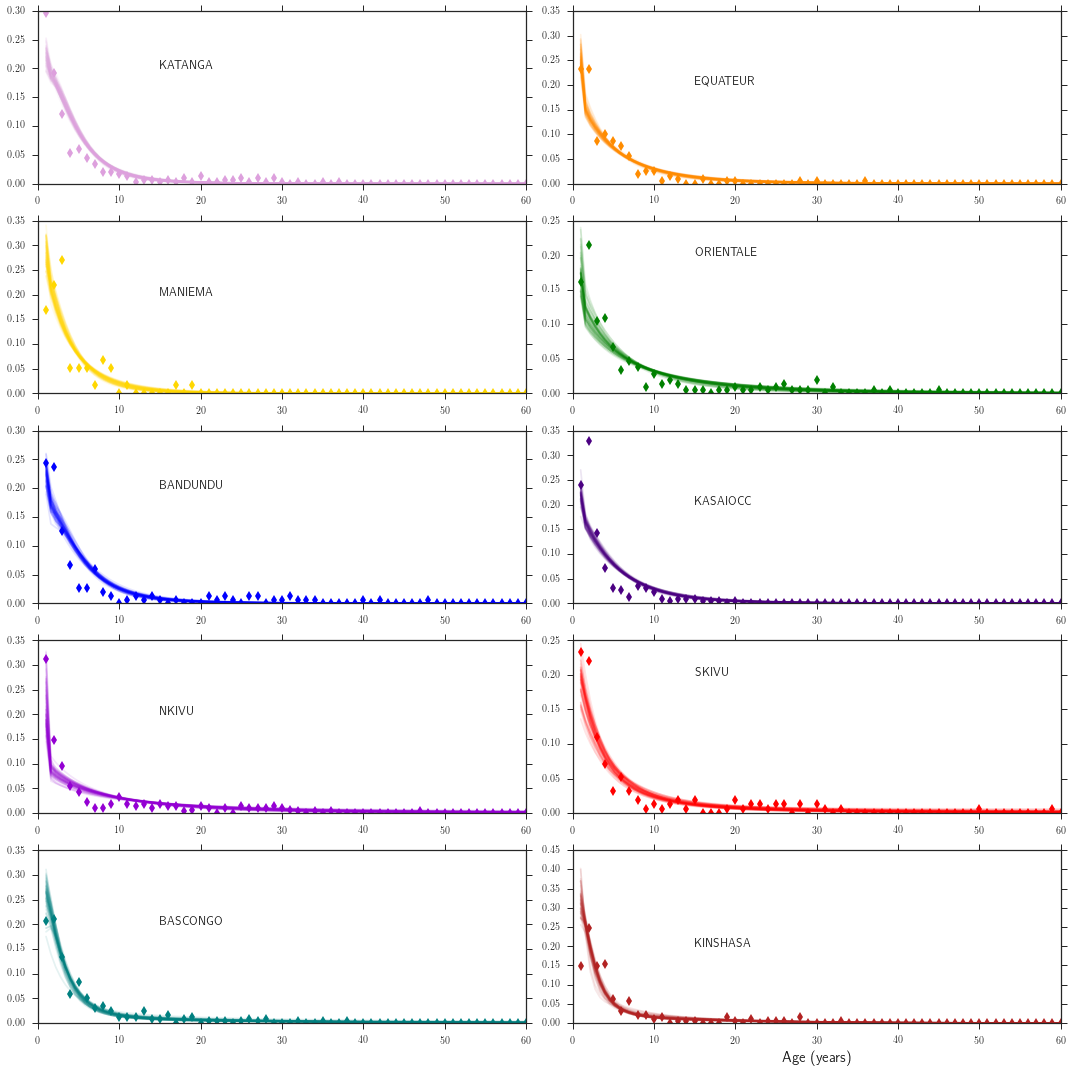

In [15]:
loc_subset = ['KATANGA','EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC','NKIVU','SKIVU','BASCONGO','KINSHASA']
colors = ['plum','darkorange','gold','green','blue','indigo','darkviolet','red','teal','firebrick','grey']
#loc_subset = ['BASCONGO','KINSHASA']
#colors = ['teal','firebrick'] #use grey for KASAIOCC
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axis = axes.flatten()
j = 0
for prov in loc_subset:

    cases = cases_pandas.loc[:,prov]
    co = cases.values
    cobs = np.copy(co)  
    total_cases = np.sum(cobs)
    
    samples = []
    c = colors[j]
    ax = axis[j]
    j += 1
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    nspace = 100
    x = np.linspace(1,60.,nspace)
    
    vacc = np.zeros(nspace)
    sero = np.zeros(nspace)
    case = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 50

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]

       
        m = 0
        for i in x:
            a = float(i)
            case[m] = (1.-np.exp(-(fh*fa/fb*(a*12./fb))**(fa-1.)*np.exp(-(a*12./fb)**fa)))\
            *(np.exp(-ve*vh*(1.-np.exp(-(a*12./vb)**va))-fh*(1.-np.exp(-(a*12./fb)**fa))))
            m += 1
        ax.plot(x,case/(sum(case)*(x[1]-x[0])),alpha=0.1,color=c)
    ax.plot(xplot,cobs.astype(float)/total_cases,color=c,linestyle='none',marker='d')
        #ax1.plot(x/12.,case,alpha=0.1,color=c)
    ax.annotate(prov,(15,0.2),fontsize=12)
    

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('CaseFits.png')
#plt.savefig('DRC_foivachaz_noSKivu.pdf')

In [40]:
#Here is the final location and color list:
locs = ['BANDUNDU', 'EQUATEUR', 'KATANGA', 'KINSHASA', 'NKIVU', 'ORIENTALE', 'SKIVU', 'BASCONGO',\
         'KASAIOCC','KASAIOR', 'MANIEMA']
colors = ['darkorange','gold','green','blue','indigo','darkviolet','red','teal','grey','plum','firebrick']

BANDUNDU 1989
BANDUNDU 989
EQUATEUR 1989
EQUATEUR 1490
KATANGA 1989
KATANGA 989
KINSHASA 1399
KINSHASA 989
NKIVU 1989
NKIVU 989
ORIENTALE 989
ORIENTALE 989
SKIVU 1989
SKIVU 989
BASCONGO 1490
BASCONGO 1490
KASAIOCC 1490
KASAIOCC 1490
KASAIOR 1490
KASAIOR 1490
MANIEMA 2190
MANIEMA 1490


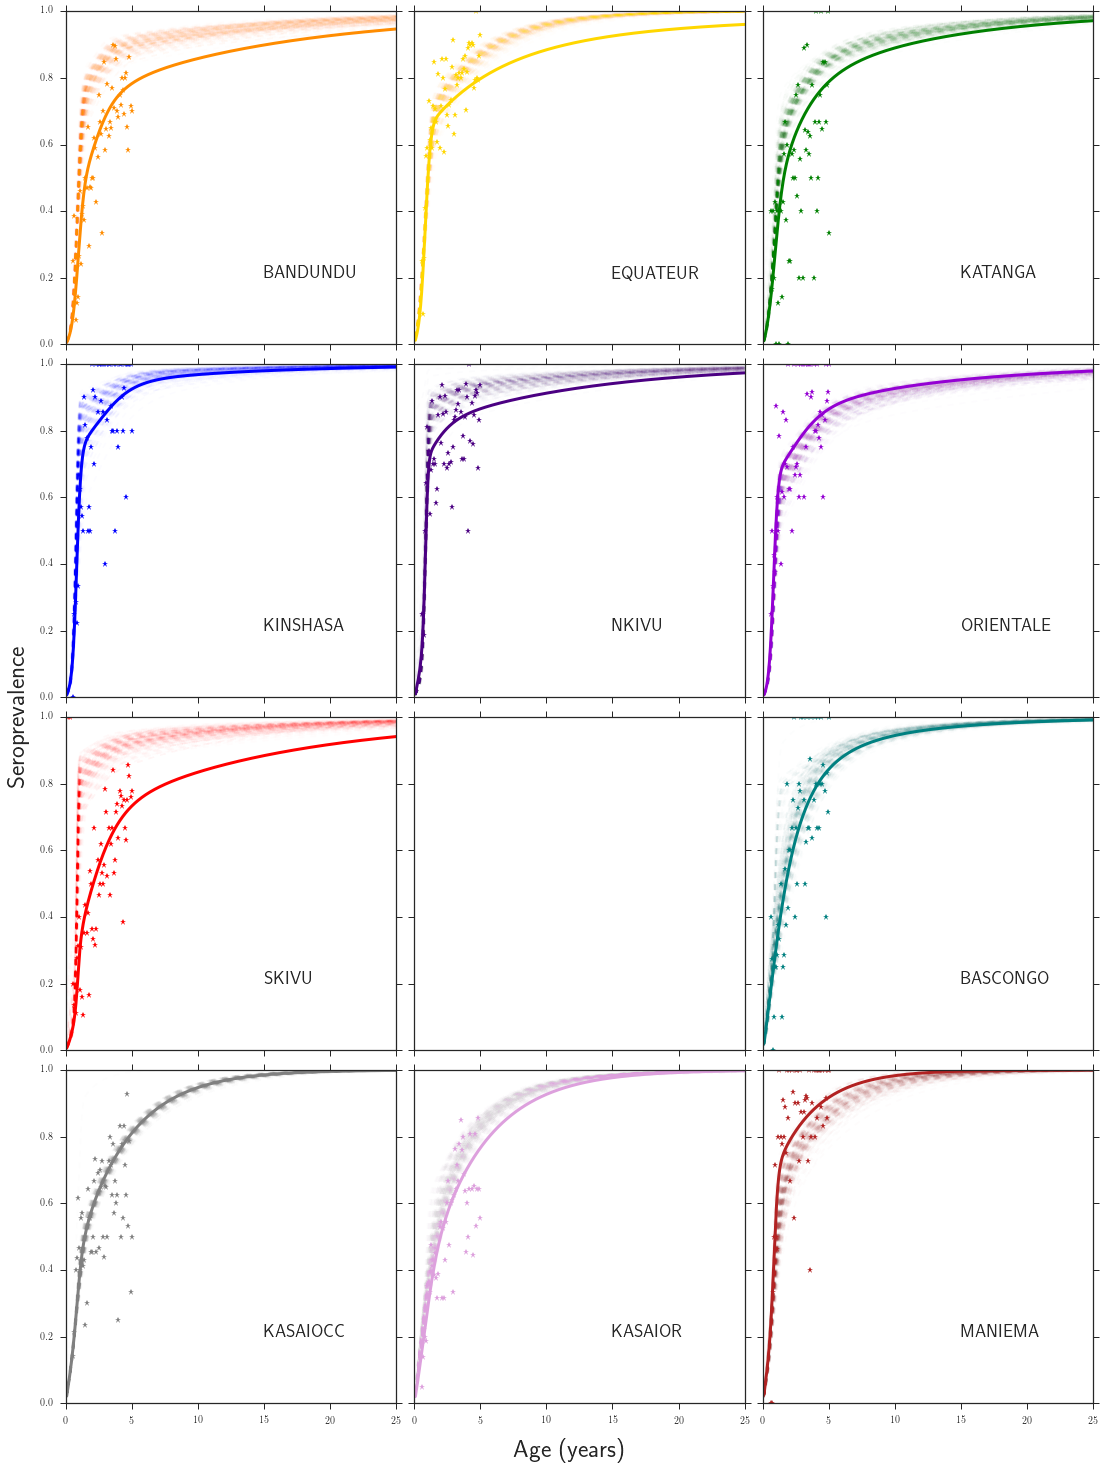

In [41]:
#First, the seroprevalence for each.:
burnin = 500
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,20),sharex=True,sharey=True)
axis = axes.flatten()

nspace = 1000
x = np.linspace(1,25*12,nspace)
xplot = np.linspace(1,25*12,nspace)
xdata = np.linspace(1,60,60)

j = 0
for prov in locs:
    #Read in the actual data
    vobs = vobs_pandas.loc[:,prov]
    vtrial = vtrials_pandas.loc[:,prov]
    sobs = sobs_pandas.loc[:,prov]
    strial = strials_pandas.loc[:,prov]
    cases = cases_pandas.loc[:,prov]
    vo = vobs.values
    vt = vtrial.values
    so = sobs.values
    st = strial.values
    co = cases.values
    
    vobs = np.copy(vo)
    vtry = np.copy(vt)
    sobs = np.copy(so)
    stry = np.copy(st)
    cobs = np.copy(co)  
    vtry = np.array(vtry)   
    

    #Get the samples for this province
    samples = []
    if j>7:
        c = colors[j-1]
    else:
        c = colors[j]
    if j==7:
        j+= 1
    ax = axis[j]
    j += 1
    i = 0
    for line in open('chains/BFtest/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    if j>7:
        samples = []
        for line in open('chains/BFtest/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                samples.append(sample)
            i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    print prov, len(samples)
    
    snosero = []
    i = 0
    for line in open('chains/BFtest/nosero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            snosero.append(sample)
        i += 1
    if j>7 or prov=='EQUATEUR':
        snosero = []
        for line in open('chains/BFtest/nosero/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                snosero.append(sample)
            i += 1
    snosero = np.array(snosero)
    snosero = snosero.astype(float)
    print prov, len(snosero)
    
    sero = np.zeros(nspace)
    nosero = np.zeros(nspace)

    #l = len(samples[:,0])
    l = 900
    nplot = 300

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]
        con = samples[index,7]
        alph = samples[index,8]
        
        vans = snosero[index,0] 
        vbns = snosero[index,1] 
        vhns = snosero[index,2]  
        fans = snosero[index,3] 
        fbns = snosero[index,4] 
        fhns = snosero[index,5] 
        vens = snosero[index,6]
        conns = snosero[index,7]
        alphns = snosero[index,8]
        
        if j>8:
            alph = 0.
             
        m = 0
        for i in x:
            a = float(i)
            if j<= 7 and prov != 'EQUATEUR':
                sero[m] += 1. - np.exp(-vh*ve*(1. - np.exp(-(a/vb)**va)) - (alph)*fh*(1. - np.exp(-(a/fb)**fa))-con*a)
                nosero[m] = 1. - np.exp(-vhns*vens*(1. - np.exp(-(a/vbns)**vans))\
                                    - (alphns)*fhns*(1. - np.exp(-(a/fbns)**fans))-conns*a)
            if j>7 or prov=='EQUATEUR':
                sero[m] += 1. - np.exp(-vh*ve*(1. - np.exp(-(a/vb)**va))-con*a)
                nosero[m] = 1. - np.exp(-vhns*vens*(1. - np.exp(-(a/vbns)**vans))-conns*a)
            m += 1
        ax.plot(x/12.,nosero,alpha=0.01,color=c,linestyle='dashed')
        
    ax.plot(xdata/12.,sobs.astype(float)/stry.astype(float),color=c,marker='*',linestyle='none')
    sero /= nplot
    ax.plot(x/12.,sero,alpha=1.,color=c,linewidth=3)
    ax.annotate(prov,(15,0.2),fontsize=18)

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
fig.text(-0.01, 0.5, 'Seroprevalence', ha='center', va='center', rotation='vertical',fontsize=25)
fig.text(0.5, -0.01, 'Age (years)', ha='center', va='center', rotation='horizontal',fontsize=25)
#plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
#plt.subplots_adjust(left=0.25,bottom=0.25)
plt.savefig('Seroprevalence.png',dpi=300,bbox_inches="tight")

BANDUNDU 1989
BANDUNDU 989
EQUATEUR 1989
EQUATEUR 1490
KATANGA 1989
KATANGA 989
KINSHASA 1399
KINSHASA 989
NKIVU 1989
NKIVU 989
ORIENTALE 989
ORIENTALE 989
SKIVU 1989
SKIVU 989
BASCONGO 1490
BASCONGO 1490
KASAIOCC 1490
KASAIOCC 1490
KASAIOR 1490
KASAIOR 1490
MANIEMA 2190
MANIEMA 1490


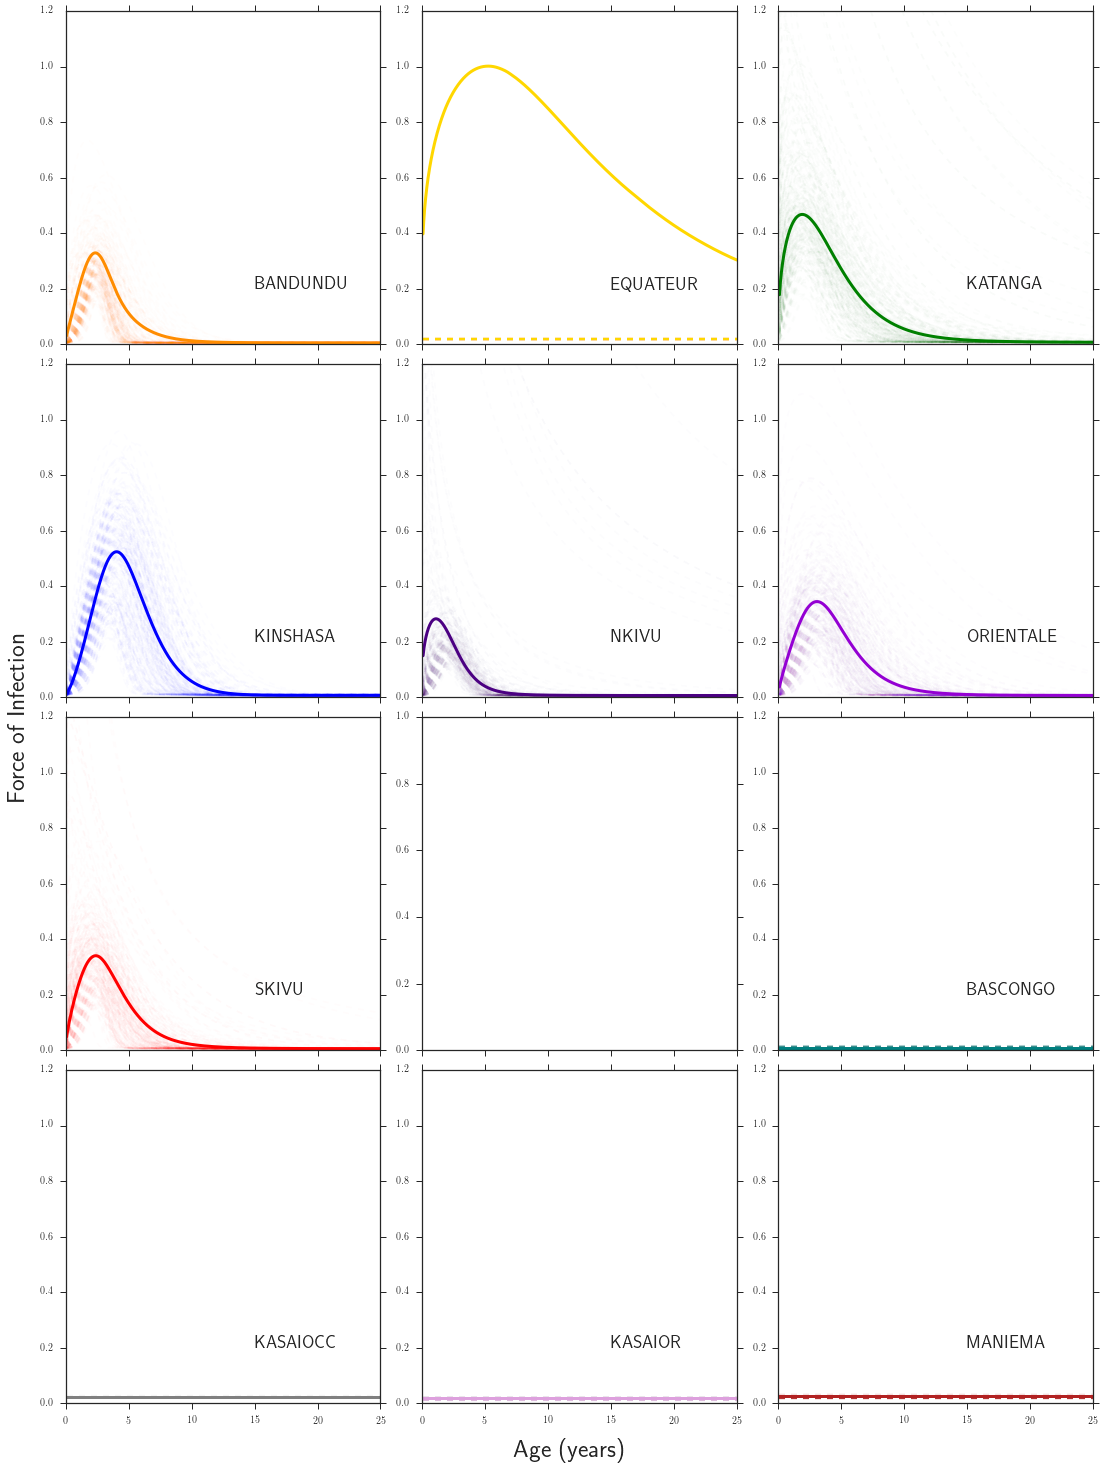

In [63]:
#FOI for each, with and without serology:
burnin = 500
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')
xplot = np.linspace(1,25,25)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,20),sharex=True,sharey=False)
axis = axes.flatten()

nspace = 1000
x = np.linspace(1,25*12,nspace)

j = 0
for prov in locs:
    #Read in the actual data
    vobs = vobs_pandas.loc[:,prov]
    vtrial = vtrials_pandas.loc[:,prov]
    sobs = sobs_pandas.loc[:,prov]
    strial = strials_pandas.loc[:,prov]
    cases = cases_pandas.loc[:,prov]
    vo = vobs.values
    vt = vtrial.values
    so = sobs.values
    st = strial.values
    co = cases.values
    
    vobs = np.copy(vo)
    vtry = np.copy(vt)
    sobs = np.copy(so)
    stry = np.copy(st)
    cobs = np.copy(co)  
    vtry = np.array(vtry)   
    

    #Get the samples for this province
    samples = []
    if j>7:
        c = colors[j-1]
    else:
        c = colors[j]
    if j==7:
        j+= 1
    ax = axis[j]
    j += 1
    i = 0
    for line in open('chains/BFtest/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    if j>7:
        samples = []
        for line in open('chains/BFtest/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                samples.append(sample)
            i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    print prov, len(samples)
    
    snosero = []
    i = 0
    for line in open('chains/BFtest/nosero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            snosero.append(sample)
        i += 1
    if j>7 or prov=='EQUATEUR':
        snosero = []
        for line in open('chains/BFtest/nosero/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                snosero.append(sample)
            i += 1
    snosero = np.array(snosero)
    snosero = snosero.astype(float)
    print prov, len(snosero)
    
    foi = np.zeros(nspace)
    nsfoi = np.zeros(nspace)

    #l = len(samples[:,0])
    l = 900
    nplot = 300

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]
        con = samples[index,7]
        alph = samples[index,8]
        
        vans = snosero[index,0] 
        vbns = snosero[index,1] 
        vhns = snosero[index,2]  
        fans = snosero[index,3] 
        fbns = snosero[index,4] 
        fhns = snosero[index,5] 
        vens = snosero[index,6]
        conns = snosero[index,7]
        alphns = snosero[index,8]
        
        if j>8:
            alph = 0.
             
        m = 0
        for i in x:
            a = float(i)
            if j<= 7 and prov != 'EQUATEUR':
                foi[m] += alph*fh*(a/fb)**(fa-1.)*np.exp(-(a/fb)**(fa))+con
                nsfoi[m] = alphns*fhns*(a/fbns)**(fans-1.)*np.exp(-(a/fbns)**(fans))+conns
            if j>7 or prov=='EQUATEUR':
                foi[m] += con
                nsfoi[m] = conns
            if prov =='EQUATEUR':
                foi[m] += alph*fh*(a/fb)**(fa-1.)*np.exp(-(a/fb)**(fa))+con
            m += 1
        ax.plot(x/12.,nsfoi,alpha=0.01,color=c,linestyle='dashed')
    #ax.plot(xplot/12.,sobs[0:25].astype(float)/stry[0:25].astype(float),color=c,marker='*',linestyle='none')
    foi /= nplot
    ax.plot(x/12.,foi,alpha=1.,color=c,linewidth=3)
    ax.annotate(prov,(15,0.2),fontsize=18)
    ax.set_ylim(0,1.2)

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
fig.text(-0.01, 0.5, 'Force of Infection', ha='center', va='center', rotation='vertical',fontsize=25)
fig.text(0.5, -0.01, 'Age (years)', ha='center', va='center', rotation='horizontal',fontsize=25)
#plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('ForceofInfection.png',dpi=200,bbox_inches="tight")

In [43]:
#Mapping
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

(26,
 5,
 [12.205664554000066, -13.455999261999978, 0.0, 0.0],
 [31.277300041000046, 5.386098154000024, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x133d11390>)

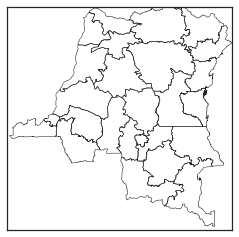

In [44]:
m = Basemap(resolution='i', # c, l, i, h, f or None (crude, low, intermediate, high)
            projection='merc', #mercator
            lat_0=54.5, lon_0=-4.36, #Coordinates of lower-left and upper-right. 
            urcrnrlon=31.33, urcrnrlat= 5.27, llcrnrlon=12.0, llcrnrlat=-13.75);
m.readshapefile('/Users/laurasampson/Work/shapefiles/DRC/GISunit/dps','areas') #DRC

In [45]:
df_poly= pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'provname': [area['name'] for area in m.areas_info]
    })
df_poly['provname'] = map(lambda x: x.upper(), df_poly['provname'])
df_poly['provname'] = df_poly['provname'].map(lambda x: x.replace('-',''))
df_poly['provname'] = df_poly['provname'].map(lambda x: x.replace(' ',''))

In [46]:
print df_poly.provname.unique()

['KINSHASA' 'KONGOCENTRAL' 'MAINDOMBE' 'KWILU' 'KWANGO' 'EQUATEUR'
 'SUDUBANGI' 'NORDUBANGI' 'MONGALA' 'TSHUAPA' 'TSHOPO' 'BASUELE'
 'HAUTUELE' 'ITURI' 'NORDKIVU' 'SUDKIVU' 'MANIEMA' 'LUALABA' 'HAUTLOMAMI'
 'TANGANYKA' 'HAUTKATANGA' 'KASAIORIENTAL' 'SANKURU' 'LOMAMI'
 'KASAICENTRAL' 'KASAI']


In [47]:
#Need to add the old province name for each of the new provinces
provtoprov = pd.read_csv('/Users/laurasampson/Work/shapefiles/DRC/GISunit/map_province_names.csv')
name = []
for pfrom in df_poly['provname']:
    pto = provtoprov.loc[provtoprov['from']==pfrom,'to'].iloc[0]
    name.append(pto)


In [48]:
df_poly= pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'provname': [area['name'] for area in m.areas_info],
        'name': [area for area in name]
    })
df_poly['provname'] = map(lambda x: x.upper(), df_poly['provname'])
df_poly['provname'] = df_poly['provname'].map(lambda x: x.replace('-',''))
df_poly['provname'] = df_poly['provname'].map(lambda x: x.replace(' ',''))
df_poly['name'] = df_poly['name'].map(lambda x: x.replace('SUDKIVU','SKIVU'))
df_poly['name'] = df_poly['name'].map(lambda x: x.replace('NORDKIVU','NKIVU'))
df_poly['name'] = df_poly['name'].map(lambda x: x.replace('KASAIORIENTAL','KASAIOR'))
df_poly['name'] = df_poly['name'].map(lambda x: x.replace('KASAIOCCIDENTAL','KASAIOCC'))

In [49]:
clist = []
#Now you need to match this to the color
for n in df_poly.name:
    j = locs.index(n)
    clist.append(colors[j])

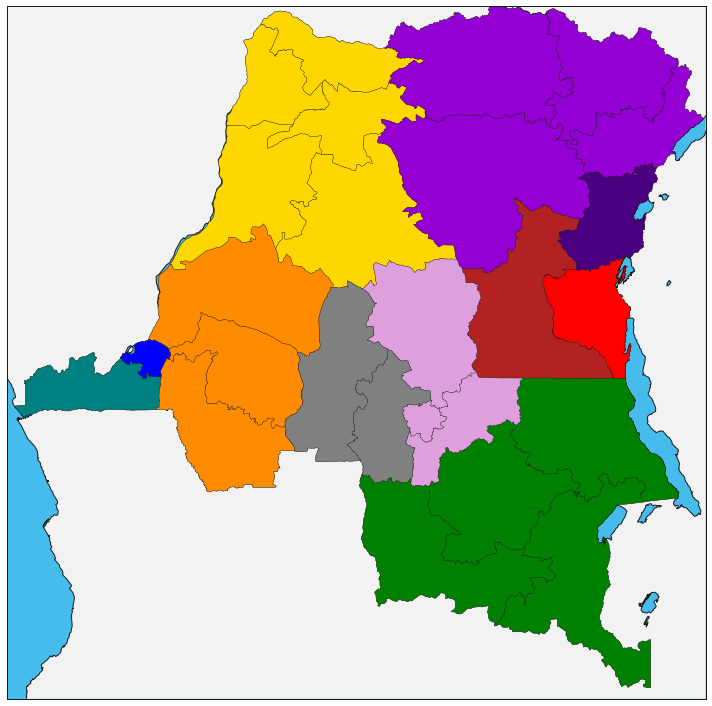

In [50]:

fig, ax = plt.subplots(figsize=(10,20));
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('/Users/laurasampson/Work/shapefiles/DRC/GISunit/dps','areas') #DRC
pc = PatchCollection(df_poly.shapes, zorder=2)
pc.set_facecolor(clist)
ax.add_collection(pc)
fig.tight_layout()
plt.savefig('ColorMap.pdf',dpi=100,bbox_inches='tight')

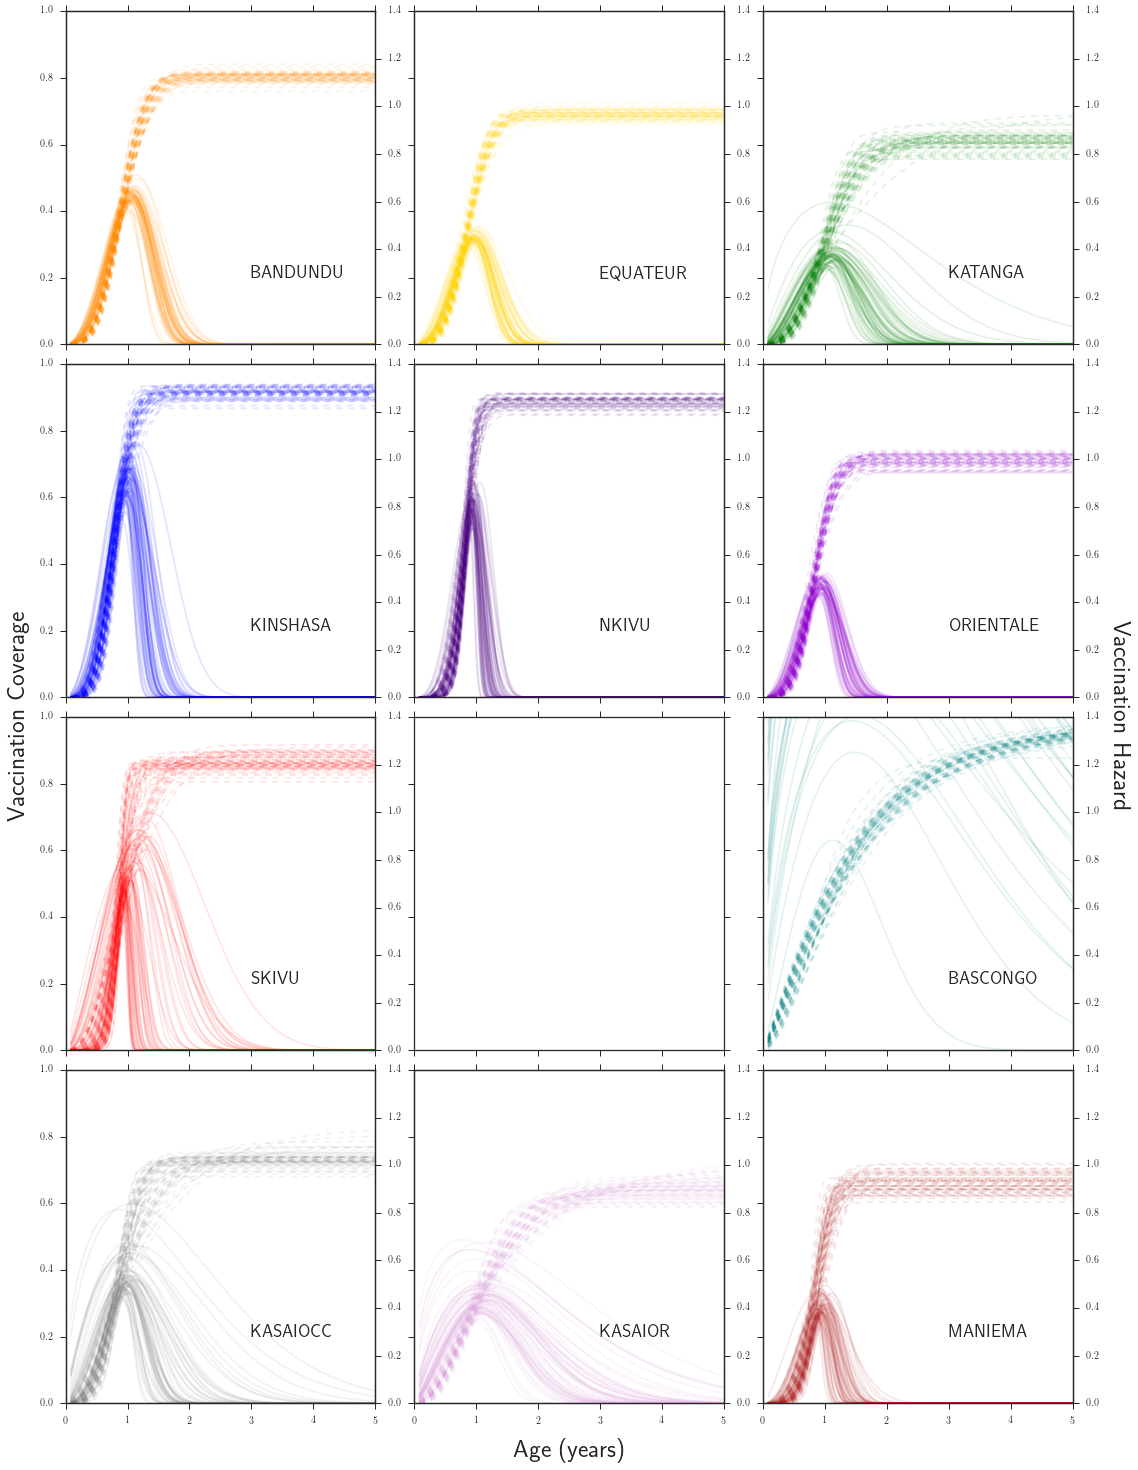

In [62]:
#Vaccination levels plus vaccination hazard
burnin = 500
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')
xplot = np.linspace(1,25,25)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,20),sharex=True,sharey=True)
axis = axes.flatten()

nspace = 1000
x = np.linspace(1,5*12,nspace)

j = 0
for prov in locs:
    #Read in the actual data
    vobs = vobs_pandas.loc[:,prov]
    vtrial = vtrials_pandas.loc[:,prov]
    sobs = sobs_pandas.loc[:,prov]
    strial = strials_pandas.loc[:,prov]
    cases = cases_pandas.loc[:,prov]
    vo = vobs.values
    vt = vtrial.values
    so = sobs.values
    st = strial.values
    co = cases.values
    
    vobs = np.copy(vo)
    vtry = np.copy(vt)
    sobs = np.copy(so)
    stry = np.copy(st)
    cobs = np.copy(co)  
    vtry = np.array(vtry)   
    

    #Get the samples for this province
    samples = []
    if j>7:
        c = colors[j-1]
    else:
        c = colors[j]
    if j==7:
        j+= 1
    ax = axis[j]
    ax2 = ax.twinx()
    j += 1
    i = 0
    for line in open('chains/BFtest/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    if j>7:
        samples = []
        for line in open('chains/BFtest/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                samples.append(sample)
            i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    #print prov, len(samples)
    
    vacc = np.zeros(nspace)
    vhaz = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 60

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]
        con = samples[index,7]
        alph = samples[index,8]
        if j>7:
            alph = 0.
             
        m = 0
        for i in x:
            a = float(i)
            vhaz[m] = vh*(a/vb)**(va-1.)*np.exp(-(a/vb)**(va))
            vacc[m] = 1. - np.exp(-vh*(1. - np.exp(-(a/vb)**va)))
            m += 1
        ax.plot(x/12.,vacc,alpha=0.1,color=c,linestyle='dashed')
        ax2.plot(x/12.,vhaz,alpha=0.1,color=c)
        #ax2.set_yticks([],[])
    #ax.plot(xplot/12.,sobs[0:25].astype(float)/stry[0:25].astype(float),color=c,marker='*',linestyle='none')
    ax.annotate(prov,(3,0.2),fontsize=18)
    ax.set_ybound(0.,1.)
    ax2.set_ylim(0,1.4)

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
fig.text(-0.01, 0.5, 'Vaccination Coverage', ha='center', va='center', rotation='vertical',fontsize=25)
fig.text(1.01, 0.5, 'Vaccination Hazard', ha='center', va='center', rotation=270,fontsize=25)
fig.text(0.5, -0.01, 'Age (years)', ha='center', va='center',fontsize=25)
#plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('VaccHazard.png',dpi=200,bbox_inches="tight")

darkorange BANDUNDU
gold EQUATEUR
green KATANGA
blue KINSHASA
indigo NKIVU
darkviolet ORIENTALE
red SKIVU
teal BASCONGO
grey KASAIOCC
plum KASAIOR
firebrick MANIEMA


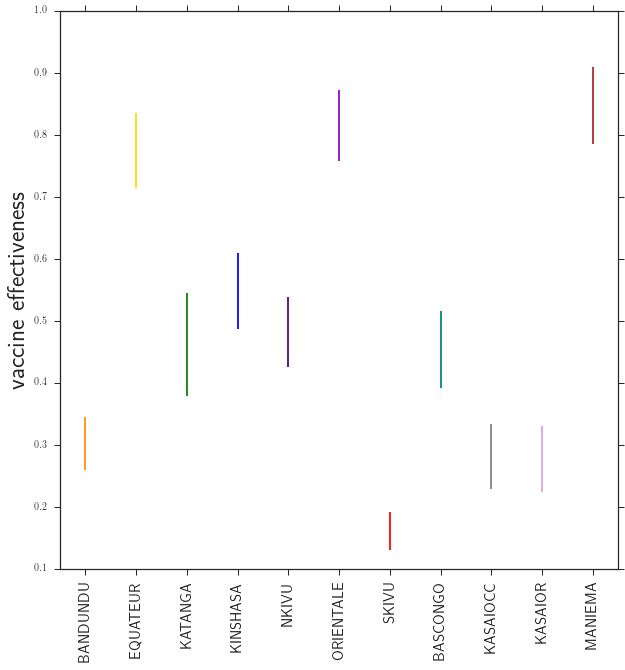

In [52]:
#Vaccine effectiveness
#Vaccination levels plus vaccination hazard
burnin = 500
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')
xplot = np.linspace(1,25,25)

nspace = 1000
x = np.linspace(1,25*12,nspace)
plt.figure(figsize=(10,10))
j = 0
for prov in locs:
    
    #Get the samples for this province
    samples = []
    if j>7:
        c = colors[j-1]
    else:
        c = colors[j]
    if j==7:
        j+= 1
    j += 1
    i = 0
    for line in open('chains/BFtest/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    if j>7:
        samples = []
        for line in open('chains/BFtest/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                samples.append(sample)
            i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    
    l = len(samples[:,0])
    nplot = 100
    
    if j<8:
        r = j
    else:
        r = j-1
    
    vemean = np.mean(samples[:,6])
    vesig = np.sqrt(np.var(samples[:,6]))
    print c, prov
    plt.errorbar(r,vemean,xerr=None,yerr=vesig,color=c)

    #ax.plot(xplot/12.,sobs[0:25].astype(float)/stry[0:25].astype(float),color=c,marker='*',linestyle='none')
    
plt.xticks(np.linspace(1,11,11),locs,rotation='vertical',fontsize=15)
plt.xlim(0.5,11.5)
plt.ylabel('vaccine effectiveness',fontsize=25)

fig.tight_layout()
plt.savefig('Veff.png',dpi=125,bbox_inches="tight")

In [53]:
#Now, you want to calculate the integrated for of infection for the three different data combinations for each
#province. (just serology, vaccination plus case data, and all three.)
burnin = 500
nspace = 1000
x = np.linspace(1,10*12,nspace)
locs = ['BANDUNDU', 'EQUATEUR', 'KATANGA', 'KINSHASA', 'NKIVU', 'ORIENTALE', 'SKIVU', 'BASCONGO',\
         'KASAIOCC','KASAIOR', 'MANIEMA']

locs = ['BANDUNDU','EQUATEUR','KATANGA','KINSHASA' , 'NKIVU', 'ORIENTALE', 'SKIVU', 'BASCONGO',\
         'KASAIOCC','KASAIOR', 'MANIEMA']

risk = []    
j = 0
for prov in locs:
    #Get the samples for this province
    samples = []
    if j==7:
        j+= 1
    j += 1
    i = 0
    for line in open('chains/BFtest/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    if j>7:
        samples = []
        for line in open('chains/BFtest/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                samples.append(sample)
            i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    print prov, len(samples)
    
    snosero = []
    i = 0
    for line in open('chains/BFtest/nosero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            snosero.append(sample)
        i += 1
    if j>7 or prov=='EQUATEUR':
        snosero = []
        for line in open('chains/BFtest/nosero/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                snosero.append(sample)
            i += 1
    snosero = np.array(snosero)
    snosero = snosero.astype(float)
    print prov, len(snosero)
    
    sonlysero = []
    i = 0
    for line in open('chains/BFtest/onlysero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            sonlysero.append(sample)
        i += 1

    sonlysero = np.array(sonlysero)
    sonlysero = sonlysero.astype(float)
    print prov, len(sonlysero)
    
    sero = np.zeros(nspace)
    nosero = np.zeros(nspace)
    onlysero = np.zeros(nspace)
    
    sumsero     = []
    sumnosero   = []
    sumonlysero = []

    #l = len(samples[:,0])
    l = 900
    nplot = 800
    n = 0
    for k in range(nplot):
        index = np.random.randint(l)
        index = -n

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]
        con = samples[index,7]
        alph = samples[index,8]
        
        vans = snosero[index,0] 
        vbns = snosero[index,1] 
        vhns = snosero[index,2]  
        fans = snosero[index,3] 
        fbns = snosero[index,4] 
        fhns = snosero[index,5] 
        vens = snosero[index,6]
        conns = snosero[index,7]
        alphns = snosero[index,8]
        
        vanso = sonlysero[index,0] 
        vbnso = sonlysero[index,1] 
        vhnso = sonlysero[index,2]
        venso = sonlysero[index,6]
        conos = sonlysero[index,7]
        
        if j>8:
            alph = 0.
             
        m = 0
        for i in x:
            a = float(i)
            onlysero[m] = conos
            if j<= 7 and prov != 'EQUATEUR':
                sero[m] = alph*fh*(a/fb)**(fa-1.)*np.exp(-(a/fb)**(fa))+con
                nosero[m] = alphns*fhns*(a/fbns)**(fans-1.)*np.exp(-(a/fbns)**(fans))+conns
            if j>7 or prov=='EQUATEUR':
                sero[m] = con
                nosero[m] = conns
            m += 1
        sumsero.append(np.sum(sero))
        sumnosero.append(np.sum(nosero))
        sumonlysero.append(np.sum(onlysero))
        n += 1
    sumsero = np.array(sumsero)
    sumnosero = np.array(sumnosero)
    sumonlysero = np.array(sumonlysero)
    medsero = np.median(sumsero)
    mednosero = np.median(sumnosero)
    medonlysero = np.median(sumonlysero)
    dx = x[1] - x[0]
    
    print  (medonlysero*dx), mednosero*dx, medsero*dx
    risk.append([medonlysero*dx,mednosero*dx,medsero*dx])


BANDUNDU 1989
BANDUNDU 989
BANDUNDU 989
3.4252267964692162 9.120389271640033 11.899375747462217
EQUATEUR 1989
EQUATEUR 1490
EQUATEUR 989
2.348426045897965 2.3279220209702136 1.3955782112275348
KATANGA 1989
KATANGA 989
KATANGA 989
3.004305312412065 28.386253674092213 27.95413571503151
KINSHASA 1399
KINSHASA 989
KINSHASA 989
6.778130145889782 30.968622226089966 30.64975337904724
NKIVU 1989
NKIVU 989
NKIVU 989
2.0283969497110457 7.9869354290777945 11.326671217053438
ORIENTALE 989
ORIENTALE 989
ORIENTALE 989
5.746527428162194 18.864998916633635 19.34106910930821
SKIVU 1989
SKIVU 989
SKIVU 989
2.7792692043254745 15.552476924502134 16.871515224923495
BASCONGO 1490
BASCONGO 1490
BASCONGO 989
3.6575404731923036 1.0750516860290267 1.0191743429736295
KASAIOCC 1490
KASAIOCC 1490
KASAIOCC 989
0.8180991905801352 2.5452123106907907 2.5342382671566344
KASAIOR 1490
KASAIOR 1490
KASAIOR 989
2.9065976513100953 1.9933559992443661 2.298316556209205
MANIEMA 2190
MANIEMA 1490
MANIEMA 989
1.9803659478853242 

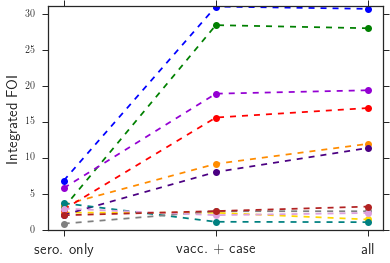

In [61]:
risk = np.array(risk)
plt.plot(risk[0,:], linestyle='--',marker='o',color=colors[0])
plt.plot(risk[1,:],linestyle='--',marker='o',color=colors[1])
plt.plot(risk[2,:],linestyle='--',marker='o',color=colors[2])
plt.plot(risk[3,:],linestyle='--',marker='o',color=colors[3])
plt.plot(risk[4,:],linestyle='--',marker='o',color=colors[4])
plt.plot(risk[5,:],linestyle='--',marker='o',color=colors[5])
plt.plot(risk[6,:],linestyle='--',marker='o',color=colors[6])
plt.plot(risk[7,:],linestyle='--',marker='o',color=colors[7])
plt.plot(risk[8,:],linestyle='--',marker='o',color=colors[8])
plt.plot(risk[9,:],linestyle='--',marker='o',color=colors[9])
plt.plot(risk[10,:],linestyle='--',marker='o',color=colors[10])
plt.xticks([0,1,2],['sero. only','vacc. + case','all'],rotation=0,fontsize=15)
plt.ylabel('Integrated FOI',fontsize=15)
plt.xlim(-0.1,2.1)
plt.ylim(0,31)
plt.savefig("RiskRank.png",dpi=200,bbox_inches='tight')

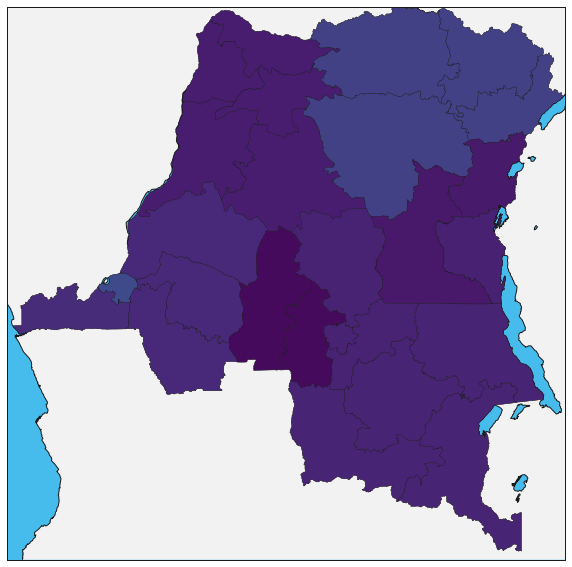

In [55]:
m = Basemap(resolution='i', # c, l, i, h, f or None (crude, low, intermediate, high)
            projection='merc', #mercator
            lat_0=54.5, lon_0=-4.36, #Coordinates of lower-left and upper-right. 
            urcrnrlon=31.33, urcrnrlat= 5.27, llcrnrlon=12.0, llcrnrlat=-13.75);
#m.readshapefile('/Users/laurasampson/Work/shapefiles/DRC/GISunit/dps','areas') #DRC

cmap = plt.get_cmap('viridis')   #Correct choice for color map.
cmap.set_bad('k')
vmin = 0.
vmax = 30.
norm = Normalize(vmin,vmax)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
z = risk[:,0]
#z = gpdata[toplot].values
z[np.isinf(z)] = np.nan
clist = []
#Now you need to match this to the color
for n in df_poly.name:
    j = locs.index(n)
    clist.append(norm(z[j]))
fig, ax = plt.subplots(figsize=(10,20));
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('/Users/laurasampson/Work/shapefiles/DRC/GISunit/dps','areas') #DRC
pc = PatchCollection(df_poly.shapes, zorder=2)
pc.set_facecolor(cmap(clist))
ax.add_collection(pc)
plt.savefig("RiskMap_sonly.png",dpi=100,bbox_inches='tight')

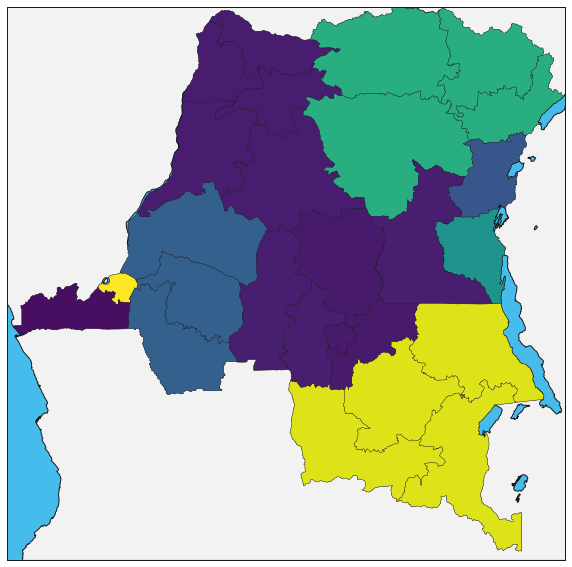

In [56]:
z = risk[:,1]
#z = gpdata[toplot].values
z[np.isinf(z)] = np.nan
clist = []
#Now you need to match this to the color
for n in df_poly.name:
    j = locs.index(n)
    clist.append(norm(z[j]))
fig, ax = plt.subplots(figsize=(10,20));
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('/Users/laurasampson/Work/shapefiles/DRC/GISunit/dps','areas') #DRC
pc = PatchCollection(df_poly.shapes, zorder=2)
pc.set_facecolor(cmap(clist))
ax.add_collection(pc)
plt.savefig("RiskMap_vaxcase.png",dpi=100,bbox_inches='tight')

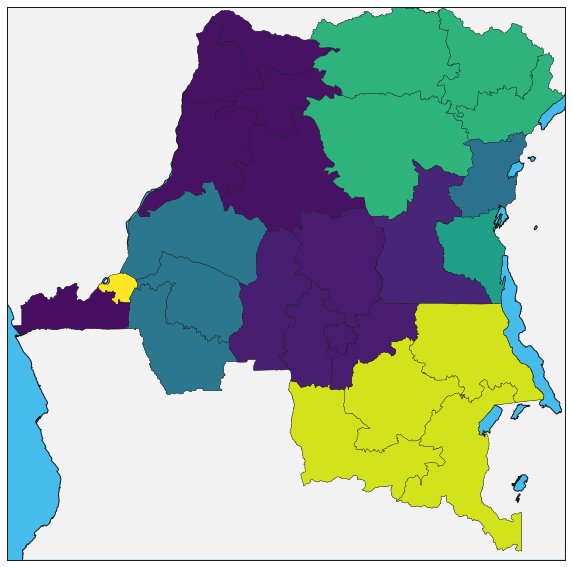

In [57]:
z = risk[:,2]
#z = gpdata[toplot].values
z[np.isinf(z)] = np.nan
clist = []
#Now you need to match this to the color
for n in df_poly.name:
    j = locs.index(n)
    clist.append(norm(z[j]))
fig, ax = plt.subplots(figsize=(10,20));
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('/Users/laurasampson/Work/shapefiles/DRC/GISunit/dps','areas') #DRC
pc = PatchCollection(df_poly.shapes, zorder=2)
pc.set_facecolor(cmap(clist))
ax.add_collection(pc)
plt.savefig("RiskMap_alldata.png",dpi=100,bbox_inches='tight')

In [58]:
print risk

[[ 3.4252268   9.12038927 11.89937575]
 [ 2.34842605  2.32792202  1.39557821]
 [ 3.00430531 28.38625367 27.95413572]
 [ 6.77813015 30.96862223 30.64975338]
 [ 2.02839695  7.98693543 11.32667122]
 [ 5.74652743 18.86499892 19.34106911]
 [ 2.7792692  15.55247692 16.87151522]
 [ 3.65754047  1.07505169  1.01917434]
 [ 0.81809919  2.54521231  2.53423827]
 [ 2.90659765  1.993356    2.29831656]
 [ 1.98036595  2.5605152   3.18381735]]
